# Spring Contact Model of hairy pad

Force during detachment of Nth hair:

$F_{net} = Nf_{p} - \frac{N(N-1)}{2}k_hw\sin{\theta}$  

Non-dimensional form:  

$\hat{F}_{net} = N\hat{f}_{p} - \frac{N(N-1)}{2}\sin{\theta}$

where.

$\hat{F}_{net} = \frac{F_{net}}{k_hw}, \hat{f}_{p} = \frac{f_{p}}{k_hw}$

Condition for propogation of detachment:

$N < \frac{\hat{f}_{p}}{\sin{\theta}} - \frac{k_b}{k_h} + 1$

Alternatively:

$sin{\theta} < \frac{\hat{f}_{p}}{(N-1) + \frac{k_b}{k_h}}$

Maximum adhesion force at fixed $\theta$:

$\hat{F}_{adh} = \frac{\hat{f}_{p}}{2}[\frac{\hat{f}_{p}}{\sin{\theta}}+1]+\frac{\sin{\theta}}{8}$

where, N at maxima is:

$N_{max} = \frac{\hat{f}_{p}}{\sin{\theta}} + \frac{1}{2}$


In [1]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# Figure 2: Mechanism of detachment

In [21]:
f_max_list = [1] #non-dimensional f_max/(k_h*w)
angle_list = [2, 8] #degrees
k_ratio_list = [10] #k_b/k_h
N_max = 25
# N = np.logspace(np.log10(2),np.log10(N_max), 40) #from 2 to 1000
N = np.linspace(2, N_max, N_max-1)
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for angle in angle_list:             
            if angle != 0:
                F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
                N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
                N_zero_id = np.where(N<N_c)[0]
                F_net_soft = np.array([F_net_stiff[i] if i not in N_zero_id else 0 for i in range(len(F_net_stiff))])
            else:
                N_c = N_max
                F_net_stiff = len(N) * [(N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))]
                F_net_soft = F_net_stiff
            df_temp = pd.DataFrame({'N': N, 'Stiff': F_net_stiff, 'Soft': F_net_soft})
            df_temp = pd.melt(df_temp, id_vars=['N'], value_vars=['Stiff', 'Soft'],
                             var_name='Backing', value_name='Force')
            df_temp['angle'] = f'{angle}°'
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
            df_temp['N_c'] = N_c
            
            df = df.append(df_temp)

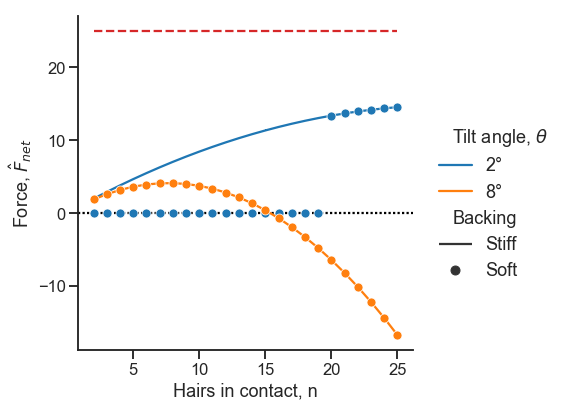

In [22]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()
g = sns.relplot(data=df, x = 'N', y = 'Force', hue = 'angle', style = 'Backing',
                size = None,  markers = [',', 'o'], dashes = [(1,0), (0,1)],
                kind = 'line', palette = pal[:2])
#symmetric log scale in y axis
# for ax1 in g.axes:
#     for ax2 in ax1:
# #         ax2.set_xscale('log')
#         ax2.set_yscale('symlog')
#         ax2.minorticks_off()
#         ticks_pos = np.logspace(0,2,2)
#         ticks = list(-ticks_pos) + list(ticks_pos)
#         ax2.set_yticks(ticks, minor = False)
# g.axes[0][0].plot(N, N*f_max, ':', color = pal[2])
g.axes[0][0].plot(N, [N_max*f_max]*len(N), '--', color = pal[3])
# g.map(plt.axhline, y=N_max*f_max, color='k', dashes=(2, 1), zorder=0)

g.map(plt.axhline, y=0, color='k', dashes=(1, 1), zorder=0)

latex_map = {'angle': r'Tilt angle, $\theta$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])
        
g.set_axis_labels('Hairs in contact, n', r'Force, $\hat{F}_{net}$')
g.fig.set_size_inches(8, 6)

g.tight_layout(w_pad=0)
plt.show()

In [23]:
plot_name = 'Figure2-Detachment_mechanism'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

# Figure 3a: Adhesion force of hairy pad

In [82]:
f_max_list = [0.01, 0.05, 0.1, 0.5, 1] #non-dimensional f_max/(k_h*w)
# angle_list = np.linspace(0,10, 40) #degrees
angle = np.append(np.linspace(0.01,0.09, 9), np.logspace(-1,np.log10(89), 40))
k_ratio_list = [10] #k_b/k_h
N_t_list = [10, 100]
# N = np.linspace(2, N_max, N_max-1)
df = pd.DataFrame()
for N_t in N_t_list:
    for k_ratio in k_ratio_list:
        for f_max in f_max_list:
#             for angle in angle_list: 
#             F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
            angle_c = np.arcsin(f_max/(N_t-1+k_ratio))*180/np.pi
#                 if angle != 0:
            N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
            N_net_max = (f_max/np.sin(angle*np.pi/180)) + 0.5 #N at F_net maxima
#             if N_net_max <= N_max: #maxima should lie within N_max
            F_maxima = ((f_max/2)*((f_max/np.sin(angle*np.pi/180))+1)) + (np.sin(angle*np.pi/180)/8)
#             else:
            F_end = (N_t*f_max) - ((N_t*(N_t-1)/2)*np.sin(angle*np.pi/180))
            F_adh = [F_maxima[i] if N_net_max[i] <= N_t else F_end[i] for i in range(len(angle))]
#                     if angle >= angle_c:
#                         F_max_soft = F_max_stiff
#                     else:
#                         F_max_soft = (N_max*f_max) - ((N_max*(N_max-1)/2)*np.sin(angle*np.pi/180))
#                 N_zero_id = np.where(N<N_c)[0]
#                 F_net_soft = np.array([F_net_stiff[i] \
#                                        if i not in N_zero_id else 0 \
#                                        for i in range(len(F_net_stiff))])
#                 else:
#                     N_c = N_max
#                     F_max_stiff = N_max*f_max
#                     F_max_soft = N_max*f_max

            df_temp = pd.DataFrame({'angle': angle,
                                    'Force': F_adh,
                                    'N_c': N_c,
                                    'N_max': N_net_max})
            #include zero angle data
            df_temp = df_temp.append(pd.DataFrame({'angle': [0],
                                                   'Force': [N_t*f_max],
                                                   'N_c': [N_t],
                                                   'N_max': [N_t]}))
#                 df_temp['angle'] = angle
            df_temp['F_max/F'] = (N_t*f_max)/df_temp['Force']
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
#             df_temp['N_c'] = N_c
            df_temp['angle_c'] = angle_c
            df_temp['N_t'] = N_t
#             df_temp['Force'] = df_temp['Force']/N_max 

            df = df.append(df_temp).reset_index(drop = True)

# df = df[df['Backing'] == 'Stiff']
# group_cols = list(df.columns.drop('N').drop('Force'))
# df_max = df.groupby(group_cols).max().reset_index()

In [83]:
df[df['angle']==angle[34]] #beetle reversibility at 7.9deg, f_max=0.1, N_t = 10

,angle,Force,N_c,N_max,F_max/F,f_max,k_ratio,angle_c,N_t
34,7.773822,0.022278,-8.926070,0.573930,4.488831,0.01,10,0.030156,10
84,7.773822,0.051149,-8.630349,0.869651,9.775338,0.05,10,0.150779,10
134,7.773822,0.103873,-8.260699,1.239301,9.627149,0.10,10,0.301558,10
184,7.773822,1.191034,-5.303495,4.196505,4.198033,0.50,10,1.507958,10
234,7.773822,4.213413,-1.606990,7.893010,2.373373,1.00,10,3.016961,10
284,7.773822,0.022278,-8.926070,0.573930,44.888314,0.01,10,0.005256,100
334,7.773822,0.051149,-8.630349,0.869651,97.753382,0.05,10,0.026282,100
384,7.773822,0.103873,-8.260699,1.239301,96.271489,0.10,10,0.052565,100
434,7.773822,1.191034,-5.303495,4.196505,41.980325,0.50,10,0.262826,100
484,7.773822,4.213413,-1.606990,7.893010,23.733729,1.00,10,0.525657,100


C:\Users\adwait\Desktop\Python\Buggee\environment\lib\site-packages\mpl_toolkits\axes_grid1\inset_locator.py:507: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0,0,1,1) now.
  warnings.warn("Using the axes or figure transform requires a "


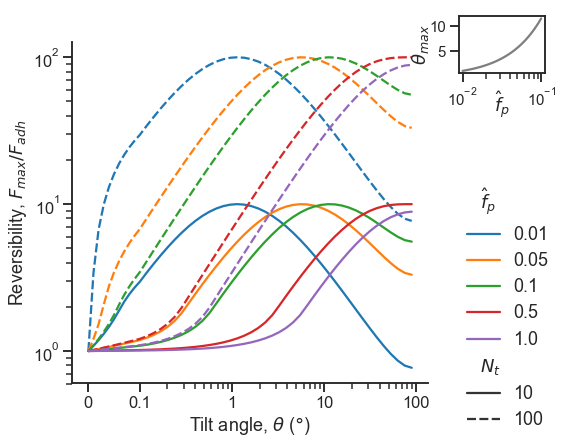

In [84]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette() #hue parameter
g = sns.relplot(data=df, x = 'angle', y = 'F_max/F', hue = 'f_max', style = 'N_t',
                kind = 'line', 
                palette = pal[:len(f_max_list)])
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_yscale('log')
        ax2.set_xscale('symlog', linthreshx = 0.1,
                      subsx = [2,3,4,5,6,7,8,9],
                      linscalex = 0.5)        
#         formatter = matplotlib.ticker.LogFormatter(linthresh = 1)
        formatter = matplotlib.ticker.FixedFormatter(['0','0.1','1','10','100'])
        ax2.xaxis.set_major_formatter(formatter)
        
latex_map = {'f_max': r'$\hat{f}_{p}$',
             'N_t': r'$N_t$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels(r'Tilt angle, $\theta$ ($\degree$)', r'Reversibility, $F_{max}/F_{adh}$')

g.fig.set_size_inches(8, 6)
# g.tight_layout(w_pad=0)
# plt.show()
#calculate Fmin/Fmax
N_t = 1
f_p = np.logspace(-2,-1,40)
# f_p = np.linspace(0.01,0.5,40)
angle_min = np.array([np.arcsin(2*f)*180/np.pi if 2*f <=1 else 90 for f in f_p])
F_min = ((f_p/2)*((f_p/np.sin(angle_min*np.pi/180))+1)) + (np.sin(angle_min*np.pi/180)/8)
F_max = N_t*f_p
F_red = F_min/F_max

# plot inset
from mpl_toolkits.axes_grid1 import inset_locator
ins_ax = inset_locator.inset_axes(g.axes[0][0],width="15%", # width = 30% of parent_bbox
                               height=0.8, # height : 1 inch
                               loc='upper right',
                                 bbox_transform = g.fig.transFigure)

ins_ax.plot(f_p, angle_min, '-', color = pal[7])
ins_ax.set_xscale('symlog', linthreshx = 0.01, subsx = [2,3,4,5,6,7,8,9])
ins_ax.set_xlabel(r'$\hat{f}_p$', labelpad=-20)
ins_ax.set_ylabel(r'$\theta_{max}$', labelpad=-2)
# ax1.set_ylabel(r'$N_tF_{min}/F_{max}$', fontsize=15, color = pal[0], labelpad=-2)
# ax1.set_xticks([0.01, 0.1, 1], minor=True)
# formatter = matplotlib.ticker.FixedFormatter([0.01, 0.1, 1])
locator = matplotlib.ticker.LogLocator()
locator.set_params(numticks = 3, numdecs=3)
ins_ax.xaxis.set_major_locator(locator)
# formatter = matplotlib.ticker.ScalarFormatter()
# formatter = matplotlib.ticker.FixedFormatter(['0.01', '0.1', '1'])
# ins_ax.xaxis.set_major_formatter(formatter)
# ins_ax.set_yticks([0,25, 50, 75], minor=True)
ins_ax.tick_params(axis='both',labelsize=15)
# ax1.spines['left'].set_color(pal[0])
# ax1.tick_params(axis='y', color=pal[0], labelcolor=pal[0], labelsize=15)
# ax1.set_ylabel(r'$\theta_{min}$', fontsize=15, color = pal[1])
# ax2.spines['right'].set_color(pal[1])
# ax2.tick_params(axis='y', color=pal[1], labelcolor=pal[1], labelsize=15)
# ax1.tight_layout()
# plt.xscale('log')
leg = g._legend
leg._loc = 4 #legend location

plt.show()

In [85]:
plot_name = 'Figure3a-Pad_adhesion_force'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

# Figure 3b: Critical tilt angle

In [30]:
f_max_list = [0.01, 0.05, 0.1, 0.5, 1] #non-dimensional f_max/(k_h*w)
k_ratio_list = np.logspace(0,3, 100) #k_b/k_h
N_max_list = [10, 100]
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for N_max in N_max_list:
            #critical angle for propogation
            sin_c = f_max/(N_max-1+k_ratio)
            if sin_c <= 1 and sin_c >= -1:
                angle_c = np.arcsin(sin_c)*180/np.pi
            else:
                angle_c = 90
            df_temp = pd.DataFrame({'angle_c': [angle_c],
                                   'f_max': [f_max],
                                   'k_ratio': [k_ratio],
                                   'N': [N_max]})
            df = df.append(df_temp)

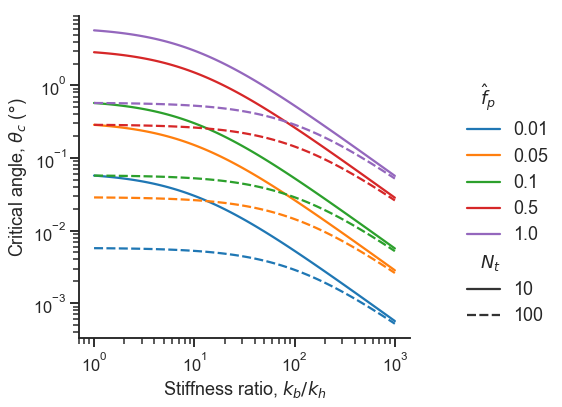

In [31]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(f_max_list)] #hue parameter
g = sns.relplot(data = df, x = 'k_ratio', y = 'angle_c', hue = 'f_max',
                style = 'N', kind = 'line', marker = None, palette = pal)
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_xscale('log')
        ax2.set_yscale('log')
#         ax2.minorticks_off()

latex_map = {'f_max': r'$\hat{f}_{p}$',
            'N': r'$N_t$'}
for text in g._legend.texts:
    if text.get_text() in latex_map.keys():
        text.set_text(latex_map[text.get_text()])

g.set_axis_labels('Stiffness ratio, $k_b/k_h$', r'Critical angle, $\theta_c$ ($\degree$)')

g.fig.set_size_inches(8, 6)
g.tight_layout(w_pad=0)
plt.show()

In [32]:
plot_name = 'Figure3b-Critical_tilt_angle'
g.fig.savefig(f'{plot_name}.svg',
            bbox_inches = 'tight', transparent = True)

In [7]:
print('theta_min for beetle', np.arcsin(2*0.1)*180/np.pi)
print('theta_lim for beetle', np.arctan(50*0.25/(9*10))*180/np.pi)

theta_min for beetle 11.536959032815489
theta_lim for beetle 7.907162702958458
